In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df = pd.read_csv("Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

In [4]:
model = LinearRegression()
model.fit(df[['Salary']], df[['YearsExperience']])

alpha = model.coef_[0]
beta = model.intercept_



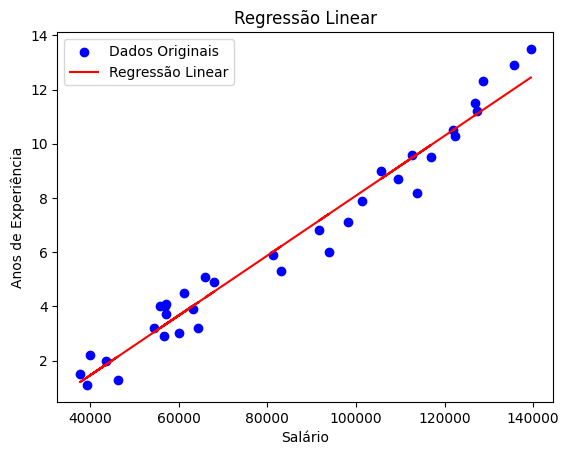

In [5]:
plt.scatter(df['Salary'], df['YearsExperience'], color='blue', label='Dados Originais')
plt.plot(df['Salary'], model.predict(df[['Salary']]), color='red', label='Regressão Linear')
plt.xlabel('Salário')
plt.ylabel('Anos de Experiência')
plt.title('Regressão Linear')
plt.legend()
plt.show()

In [7]:
modelo = sm.OLS(df[['YearsExperience']], sm.add_constant(df[['Salary']])).fit(use_t=False)
print(modelo.summary(alpha=0.01))


                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     914.3
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.23e-25
Time:                        17:12:35   Log-Likelihood:                -35.420
No. Observations:                  35   AIC:                             74.84
Df Residuals:                      33   BIC:                             77.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.005      0.995]
------------------------------------------------------------------------------
const         -2.9701      0.328     -9.055      0.0

In [11]:
infer = modelo.predict(sm.add_constant(df[['Salary']]))
erro_medio_quadrado = mean_squared_error(df[['YearsExperience']].values,infer)
raiz_erro_medio_quadra